# MNIST PROJECT

### Import Libraries

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


### Load the data

In [31]:
mnist_dataset, mnist_info = tfds.load(name="mnist", with_info=True, as_supervised=True)

In [32]:
mnist_dataset

{'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

Here we can see that the "mnist_dataset" contains the test and train data, with a shape of (28,28, 1) that shows that they are all tensor and has a grayscale image.

In [33]:
# creating the train and test sets from the mnist dataset
mnist_train, mnist_test = mnist_dataset["train"],mnist_dataset["test"]

### Visualize the data in image mode

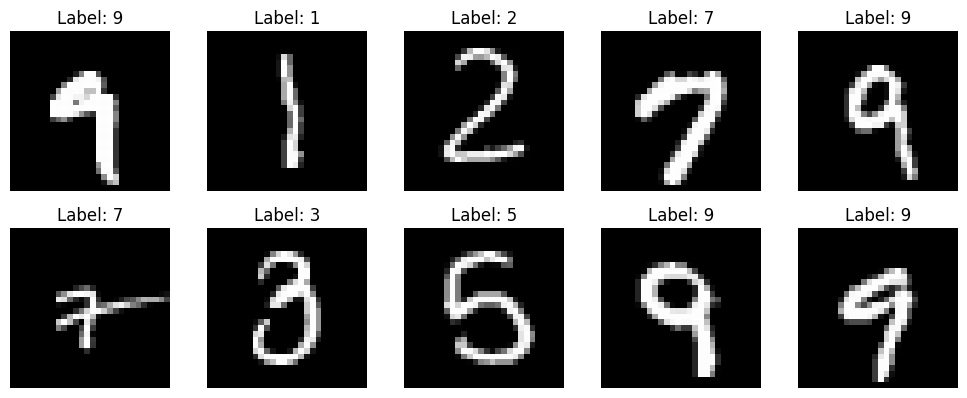

In [48]:
# Shuffle the training dataset and extract random samples
num_samples = 10  # Number of random samples to display
shuffled_mnist_train = mnist_train.shuffle(buffer_size=10000)

# Take random samples from the shuffled dataset
random_samples = shuffled_mnist_train.take(num_samples)

# Plot the random samples
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(random_samples):
    plt.subplot(5, 5, i + 1)  # Create subplots in a 5x5 grid
    plt.imshow(image.numpy(), cmap='gray')
    plt.title(f'Label: {label.numpy()}')
    plt.axis('off')

plt.tight_layout()
plt.show();

### Preprocessing

In [51]:
# setting the number of samples to 10% of the dataset
num_val_samples = 0.1 * mnist_info.splits["train"].num_examples

# to make sure that there is an Integer value we cast it to integer value using tf.cast
num_val_samples = tf.cast(num_val_samples, tf.int64)
print(f"The number of validation samples are : {num_val_samples.numpy()}")

# getting the number of test samples from the test data
num_test_samples = mnist_info.splits["test"].num_examples


#casting it to an integer value
num_test_samples = tf.cast(num_test_samples, tf.int64)

print(f"The number of test samples are: {num_test_samples.numpy()}")

The number of validation samples are : 6000
The number of test samples are: 10000


In [52]:
# defing a function that will scaled the data which is normalising the data to values between 0 & 1
def scale(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255.
  return image, label


In [53]:
# using the map method to apply the scale function we created
scaled_train_and_val_data = mnist_train.map(scale)

test_data = mnist_test.map(scale)

In [54]:
# shuffling the data
BUFFER_SIZE = 10000

shuffled_train_and_val_data = scaled_train_and_val_data.shuffle(BUFFER_SIZE)


val_data = shuffled_train_and_val_data.take(num_val_samples)
train_data = shuffled_train_and_val_data.skip(num_val_samples)

In [56]:
#Batching

BATCH_SIZE = 32


train_data = train_data.batch(BATCH_SIZE)

#the idea here is to batch the entire val data in a single iteration
val_data = val_data.batch(num_val_samples)

#the idea here is to batch the entire test data in a single iteration
test_data = test_data.batch(num_test_samples)

val_inputs, val_targets = next(iter(val_data))

In [67]:
val_targets.numpy()

array([3, 4, 7, ..., 2, 0, 3])

In [82]:
val_inputs.shape

TensorShape([6000, 28, 28, 1])

### Model 1

In [69]:
INPUT_SIZE = 784 #28 by 28  if converted to a vector
OUTPUT_SIZE = 10 # we have 10 classes 0 -9
HIDDEN_LAYER_SIZE = 100

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28,28,1)), # converts it to a vector
    tf.keras.layers.Dense(HIDDEN_LAYER_SIZE, activation="relu"),
    tf.keras.layers.Dense(HIDDEN_LAYER_SIZE, activation="relu"),
    tf.keras.layers.Dense(OUTPUT_SIZE, activation="softmax") # using softmax because it is a multiclass classification
])

### Choosing the Optimizer and the loss function

In [70]:
model_1.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",  # because the classes are not one_hot_encoded
                metrics=["accuracy"])

### Training

In [71]:
NUM_EPOCHS = 10
history_1 = model_1.fit(train_data,
                        epochs=NUM_EPOCHS,
                        validation_data=(val_inputs, val_targets),
                        verbose=2)

Epoch 1/10
1688/1688 - 14s - loss: 0.2500 - accuracy: 0.9282 - val_loss: 0.1420 - val_accuracy: 0.9565 - 14s/epoch - 8ms/step
Epoch 2/10
1688/1688 - 9s - loss: 0.1089 - accuracy: 0.9674 - val_loss: 0.1022 - val_accuracy: 0.9683 - 9s/epoch - 5ms/step
Epoch 3/10
1688/1688 - 7s - loss: 0.0777 - accuracy: 0.9762 - val_loss: 0.0661 - val_accuracy: 0.9818 - 7s/epoch - 4ms/step
Epoch 4/10
1688/1688 - 8s - loss: 0.0588 - accuracy: 0.9819 - val_loss: 0.0717 - val_accuracy: 0.9782 - 8s/epoch - 5ms/step
Epoch 5/10
1688/1688 - 9s - loss: 0.0490 - accuracy: 0.9834 - val_loss: 0.0580 - val_accuracy: 0.9835 - 9s/epoch - 6ms/step
Epoch 6/10
1688/1688 - 9s - loss: 0.0392 - accuracy: 0.9872 - val_loss: 0.0568 - val_accuracy: 0.9822 - 9s/epoch - 5ms/step
Epoch 7/10
1688/1688 - 9s - loss: 0.0333 - accuracy: 0.9890 - val_loss: 0.0646 - val_accuracy: 0.9825 - 9s/epoch - 5ms/step
Epoch 8/10
1688/1688 - 9s - loss: 0.0277 - accuracy: 0.9914 - val_loss: 0.0319 - val_accuracy: 0.9887 - 9s/epoch - 5ms/step
Epoch 

### Test the Model

In [72]:
test_loss, test_accuracy = model_1.evaluate(test_data)

1/1 [==============================] - 1s 1s/step - loss: 0.1029 - accuracy: 0.9760


In [73]:
print("Test loss: {0:.2f}. Test accuracy {1:.2f}%".format(test_loss, test_accuracy*100))

Test loss: 0.10. Test accuracy 97.60%


In [74]:
# to visualize the loss and accuracy curve
def plot_loss_curves(history):
  """
  Returns seprate loss curves for training abd validation metrics
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  epochs = range(len(history.history["loss"]))

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  # plot loss

  plt.plot(epochs, loss, label="Training loss")
  plt.plot(epochs, val_loss, label="Val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="Training Accuracy")
  plt.plot(epochs, val_accuracy, label="Validation Accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

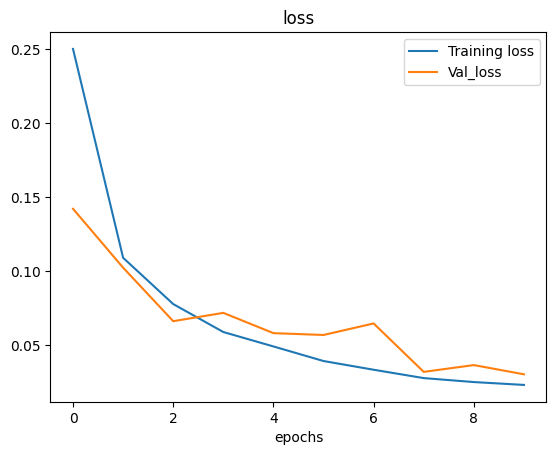

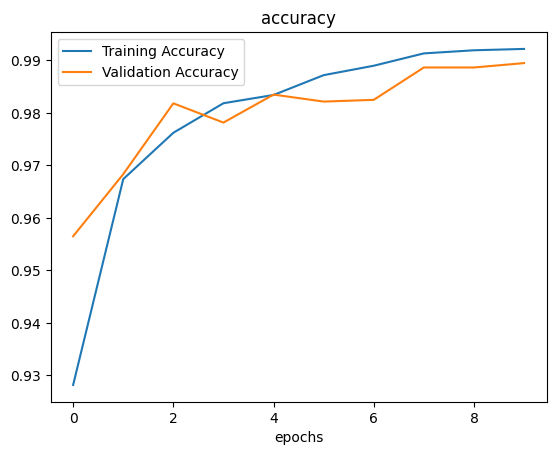

In [75]:
plot_loss_curves(history_1)

After evaluating on the test data we are not allowed to change the model, this is because the test data is no longer new to the model

## Model 2

Here we will try and change the archetecture

In [83]:
# Create the model (same as model_5 and model_6)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, input_shape=(28, 28, 1), activation='relu'),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(OUTPUT_SIZE, activation='softmax')
])

# Compile the model
model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
NUM_EPOCHS = 5
history_2 = model_2.fit(train_data,
                        epochs=NUM_EPOCHS,
                        validation_data=(val_inputs, val_targets),
                        verbose=2)

Epoch 1/5
1688/1688 - 47s - loss: 0.2941 - accuracy: 0.9066 - val_loss: 0.1067 - val_accuracy: 0.9708 - 47s/epoch - 28ms/step
Epoch 2/5
1688/1688 - 46s - loss: 0.0956 - accuracy: 0.9708 - val_loss: 0.0836 - val_accuracy: 0.9738 - 46s/epoch - 27ms/step
Epoch 3/5
1688/1688 - 45s - loss: 0.0750 - accuracy: 0.9770 - val_loss: 0.0646 - val_accuracy: 0.9790 - 45s/epoch - 27ms/step
Epoch 4/5
1688/1688 - 49s - loss: 0.0602 - accuracy: 0.9819 - val_loss: 0.0623 - val_accuracy: 0.9818 - 49s/epoch - 29ms/step
Epoch 5/5
1688/1688 - 49s - loss: 0.0533 - accuracy: 0.9833 - val_loss: 0.0563 - val_accuracy: 0.9827 - 49s/epoch - 29ms/step


In [84]:
test_loss_2, test_accuracy_2 = model_2.evaluate(test_data)

1/1 [==============================] - 2s 2s/step - loss: 0.0476 - accuracy: 0.9847


In [86]:
print("Test loss: {0:.2f}. Test accuracy {1:.2f}%".format(test_loss_2, test_accuracy_2*100))

Test loss: 0.05. Test accuracy 98.47%


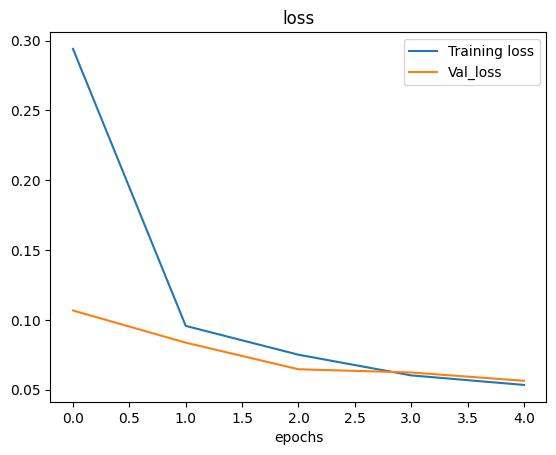

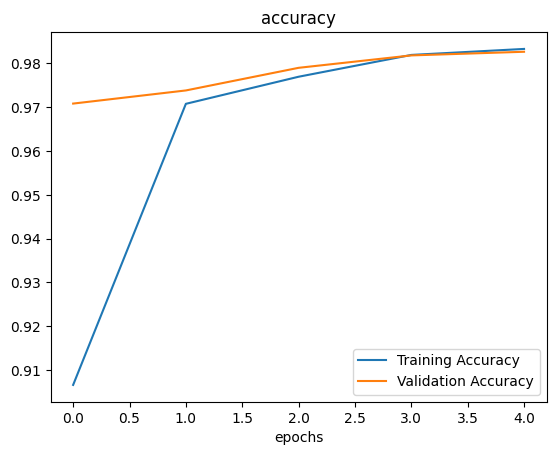

In [87]:
plot_loss_curves(history=history_2)

Model 2 out performes model 1 and it shows that the model is not overfitting because there is a steady decrease in the val_loss and a steady increase in val accuracy

**Now i will fit for longer epoch and add more filters** which will be model 3

### Model 3

In [93]:
model_3 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=HIDDEN_LAYER_SIZE, kernel_size=3, input_shape=(28, 28, 1), activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(filters=HIDDEN_LAYER_SIZE, kernel_size=3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(OUTPUT_SIZE, activation='softmax')
])

# Compile the model
model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
NUM_EPOCHS = 5
history_3 = model_3.fit(train_data,
                        epochs=NUM_EPOCHS,
                        validation_data=(val_inputs, val_targets),
                        verbose=2)

Epoch 1/5
1688/1688 - 26s - loss: 0.3245 - accuracy: 0.9010 - val_loss: 0.1215 - val_accuracy: 0.9625 - 26s/epoch - 15ms/step
Epoch 2/5
1688/1688 - 25s - loss: 0.1046 - accuracy: 0.9682 - val_loss: 0.0918 - val_accuracy: 0.9733 - 25s/epoch - 15ms/step
Epoch 3/5
1688/1688 - 25s - loss: 0.0811 - accuracy: 0.9753 - val_loss: 0.0801 - val_accuracy: 0.9765 - 25s/epoch - 15ms/step
Epoch 4/5
1688/1688 - 24s - loss: 0.0674 - accuracy: 0.9794 - val_loss: 0.0932 - val_accuracy: 0.9712 - 24s/epoch - 14ms/step
Epoch 5/5
1688/1688 - 26s - loss: 0.0604 - accuracy: 0.9812 - val_loss: 0.0662 - val_accuracy: 0.9792 - 26s/epoch - 16ms/step


In [94]:
test_loss_3, test_accurAcy_3 = model_3.evaluate(test_data)

1/1 [==============================] - 1s 1s/step - loss: 0.0577 - accuracy: 0.9806


In [95]:
print("Test loss: {0:.2f}. Test accuracy {1:.2f}%".format(test_loss_3, test_accurAcy_3*100))

Test loss: 0.06. Test accuracy 98.06%


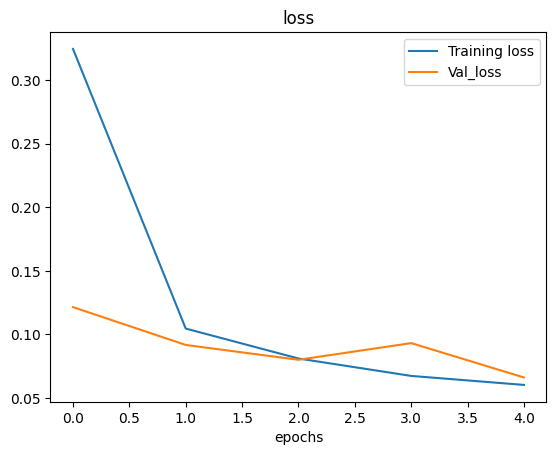

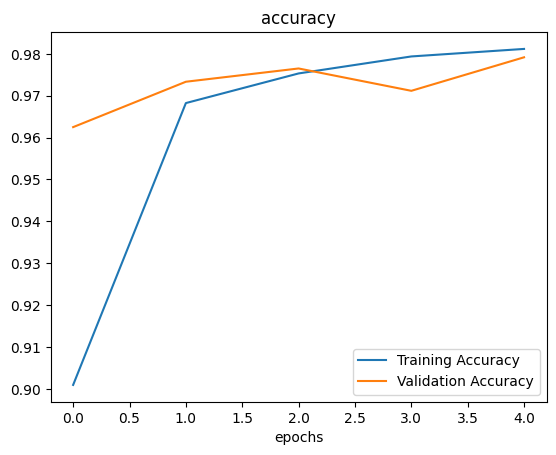

In [96]:
plot_loss_curves(history=history_3)

In [97]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 10)        910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 10)          0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 250)               0         
                                                                 
 dense_16 (Dense)            (None, 10)               

In [98]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 10)        910       
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 10)          0         
 g2D)                                                 

# Summary

We can see that the model 3 architecture is more simple that model 2 and still hits 98%  however we know model 1 is simple feedforward neural network but works well too

## Plot Confusion matrix to visualize the outcomes

In [99]:
# create confusion matrix
import itertools
from sklearn.metrics import confusion_matrix
figsize= (10,10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  # create the confusion matrix

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [101]:
test_inputs, test_targets = next(iter(test_data))

In [102]:
test_targets

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([2, 0, 4, ..., 8, 0, 5])>

In [103]:
y_probs = model_3.predict(test_inputs)

y_probs

313/313 [==============================] - 3s 10ms/step


array([[4.4258499e-12, 1.6366756e-09, 9.9999017e-01, ..., 2.9637087e-10,
        9.7208531e-06, 4.8155244e-09],
       [9.9998862e-01, 5.0677785e-14, 1.4292114e-07, ..., 1.5030654e-12,
        2.1959029e-06, 9.7075613e-08],
       [1.8185310e-12, 6.7158702e-08, 7.7297130e-08, ..., 1.3790839e-05,
        2.7357537e-06, 2.0055793e-05],
       ...,
       [3.7470542e-09, 1.3400633e-12, 3.8486836e-05, ..., 2.6959007e-14,
        9.9995631e-01, 1.1041215e-09],
       [9.9999624e-01, 5.6222926e-12, 3.5800615e-06, ..., 2.5434840e-11,
        1.2566834e-07, 3.0822247e-09],
       [9.3606616e-12, 1.6881766e-14, 8.0069534e-11, ..., 3.9261222e-15,
        8.5459733e-06, 5.5012100e-07]], dtype=float32)

In [104]:
y_probs[0], tf.argmax(y_probs[0]), test_targets[tf.argmax(y_probs[0])]

(array([4.4258499e-12, 1.6366756e-09, 9.9999017e-01, 4.0179174e-08,
        1.7874814e-09, 5.3388487e-12, 3.0460918e-14, 2.9637087e-10,
        9.7208531e-06, 4.8155244e-09], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=4>)

In [105]:
y_preds = y_probs.argmax(axis=1)

y_preds

array([2, 0, 4, ..., 8, 0, 5])

In [106]:
confusion_matrix(y_true=test_targets,
                 y_pred=y_preds)

array([[ 969,    0,    2,    0,    0,    0,    3,    2,    4,    0],
       [   0, 1126,    5,    2,    0,    1,    0,    0,    1,    0],
       [   1,    1, 1022,    2,    1,    0,    0,    1,    4,    0],
       [   0,    0,    9,  991,    0,    6,    0,    1,    2,    1],
       [   1,    1,    3,    1,  956,    0,    2,    1,    4,   13],
       [   1,    0,    1,    5,    0,  877,    1,    1,    3,    3],
       [   2,    3,    2,    0,    1,    5,  943,    0,    2,    0],
       [   0,    2,   26,    3,    0,    0,    0,  983,    2,   12],
       [   3,    0,    3,    2,    0,    2,    0,    3,  957,    4],
       [   1,    3,    3,    1,    5,    6,    0,    4,    4,  982]])

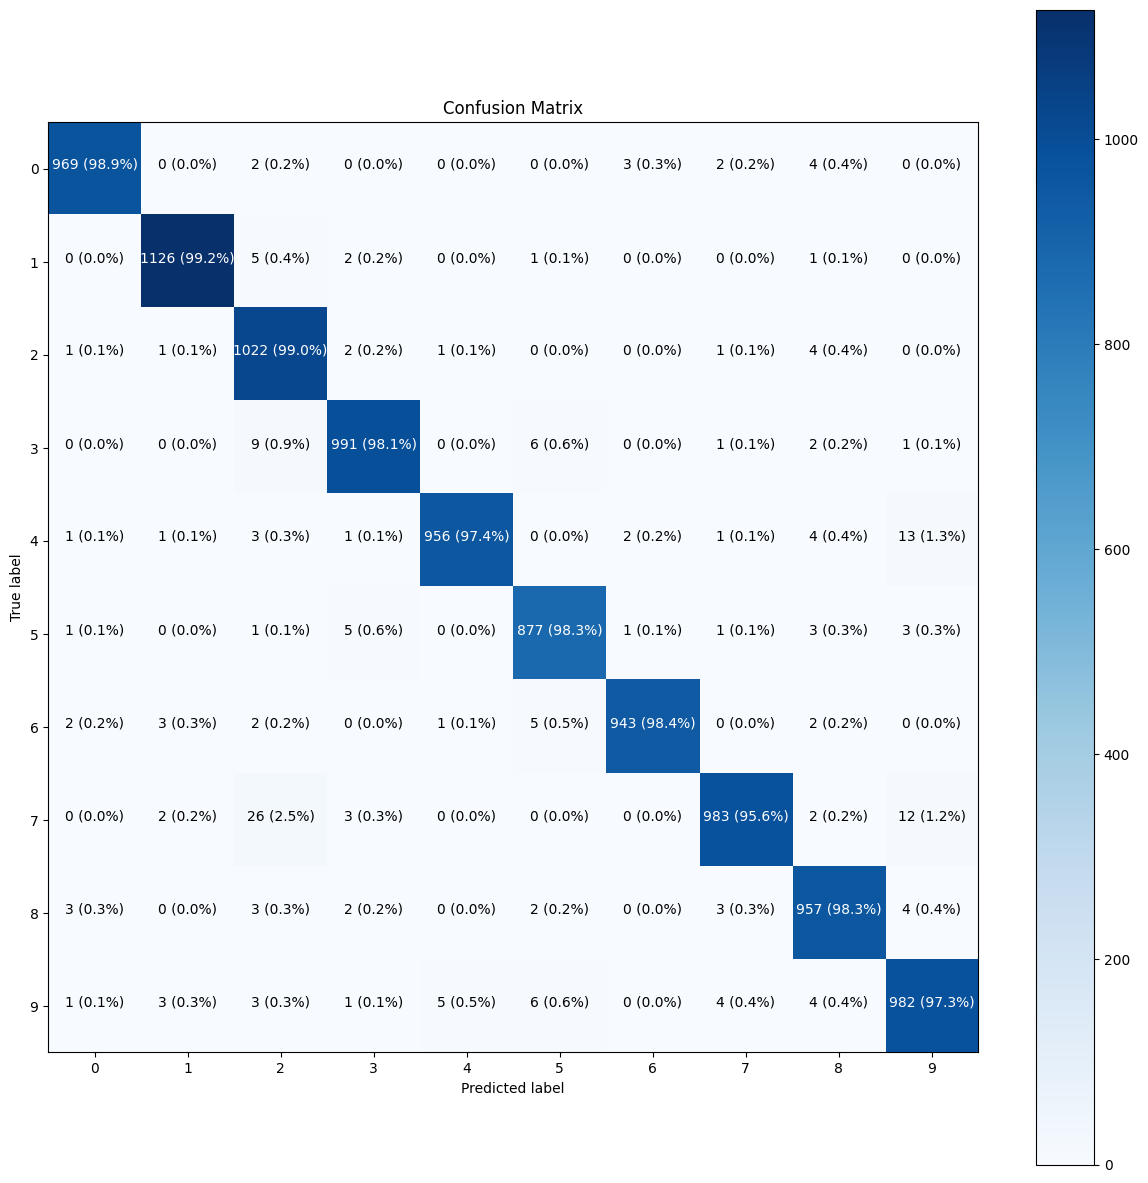

In [109]:
# make a better confusion matrix

make_confusion_matrix(y_true=test_targets,
                      y_pred= y_preds,
                      figsize=(15,15),
                      text_size=10)

Here we can see that our model is confusing 7 and 2  which is understandable it has the highest rate of 26% followed by 7 and 9 which has 12%. What we can do is get a better data

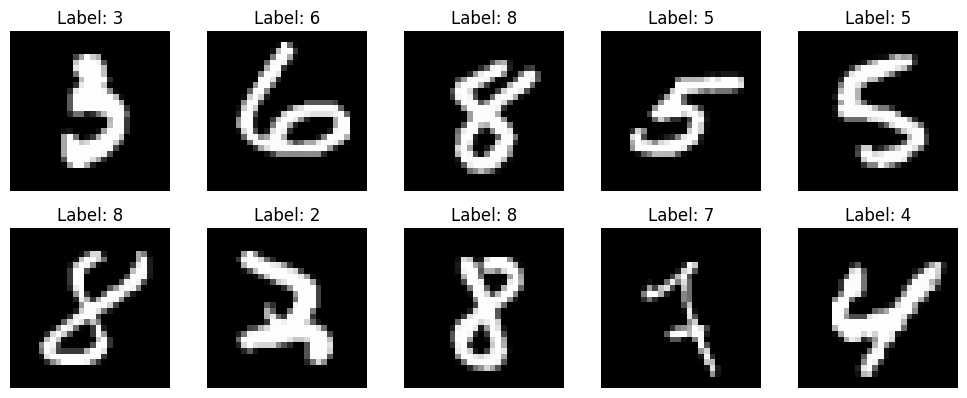

In [143]:
#lets visualize the test data


# Shuffle the training dataset and extract random samples
num_samples = 10  # Number of random samples to display
shuffled_mnist_test = mnist_test.shuffle(buffer_size=100)

# Take random samples from the shuffled dataset
random_samples = shuffled_mnist_test.take(num_samples)

# Plot the random samples
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(random_samples):
    plt.subplot(5, 5, i + 1)  # Create subplots in a 5x5 grid
    plt.imshow(image.numpy(), cmap='gray')
    plt.title(f'Label: {label.numpy()}')
    plt.axis('off')

plt.tight_layout()
plt.show();

We can see why the model misunderstands 2 and 7 alot, is because some of the images are not clear enough😇

I hope the notebook was easy to undersand please if you have any question reach out me on

- Email: andersonoki6@gmail.com
- X: @Chandoki15